In [2]:
import os
import sys

# 現在のディレクトリを取得
current_dir = os.getcwd()

# 一つ前のディレクトリを取得(srcディレクトリへのpathを作成するため)
project_dir = os.path.dirname(current_dir)

# 'src'ディレクトリへのパスを作成
src_dir = os.path.join(project_dir, 'src')

# 'src'ディレクトリのpathをPythonのパスに追加
sys.path.append(src_dir)

In [ ]:
import models
import features
import validation
import numpy as np

# ols線形重回帰分析
regression_method = 'ols_liner'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction, x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.ols_linear(autoscaled_x, autoscaled_y, x)


validate = validation.validate_model(regression_method, model, 10, autoscaled_x, autoscaled_y, x, y)

# 予測
estimated_y_prediction = models.predict(regression_method, model, autoscaled_x_prediction, x_prediction, y)


# AD
ad_method = 'ocsvm'
k_in_knn = 5  # k-NN における k
ocsvm_nu = 0.04  # OCSVM における ν。トレーニングデータにおけるサンプル数に対する、サポートベクターの数の下限の割合
ocsvm_gamma = 0.1  # OCSVM における γ
ocsvm_gammas = 2 ** np.arange(-20, 11, dtype=float)  # γ の候補
rate_of_training_samples_inside_ad = 0.96  # AD 内となるトレーニングデータの割合。AD　のしきい値を決めるときに使用

ad = models.ad(regression_method, ad_method, autoscaled_x, x, x_prediction, autoscaled_x_prediction, k_in_knn, rate_of_training_samples_inside_ad, estimated_y_prediction, ocsvm_gamma, ocsvm_gammas, ocsvm_nu)

# 次のサンプル
next_sample = x_prediction.loc[estimated_y_prediction.idxmax()]  
next_sample.to_csv('next_sample_{0}_{1}.csv'.format(regression_method, ad_method)) # csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

In [2]:
import models
import features
import validation

# ols非線形重回帰分析
regression_method = 'ols_nonlinear'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.ols_nonlinear(autoscaled_x, autoscaled_y, x)

# validation
validate = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)

# 予測
predict = models.predict(regression_method, model, autoscaled_x_prediction, x_prediction, y)

# 非線形変換を戻す
x = x_tmp.copy()
x_prediction = x_prediction_tmp.copy()
# 標準偏差が 0 の特徴量の削除
deleting_variables = x.columns[x.std() == 0]
x = x.drop(deleting_variables, axis=1)
x_prediction = x_prediction.drop(deleting_variables, axis=1)    
# オートスケーリング
autoscaled_x = (x - x.mean()) / x.std()
autoscaled_x_prediction = (x_prediction - x.mean()) / x.std()

ModuleNotFoundError: No module named 'models'

In [ ]:
import models
import features
import validation

# svr_linear線形重回帰分析
regression_method = 'svr_linear'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.svr_linear(10,autoscaled_x, autoscaled_y, x)

# 予測
predict = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)


In [ ]:
import models
import features
import validation

# svr_linear線形重回帰分析
regression_method = 'svr_gaussian'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.svr_gaussian(10,autoscaled_x, autoscaled_y, y)

# 予測
predict = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)

/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


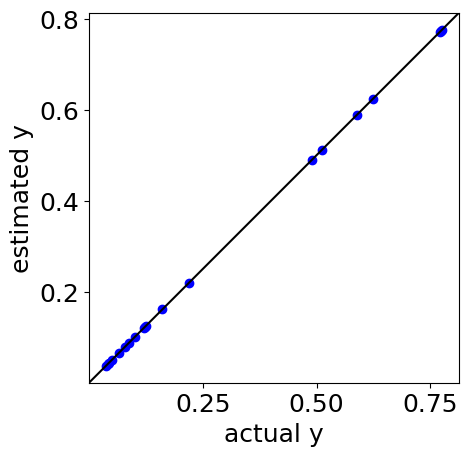

/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


r^2 for training data : 0.9999999931263742
RMSE for training data : 2.279078497503e-05
MAE for training data : 1.7018909768481624e-05


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamaza

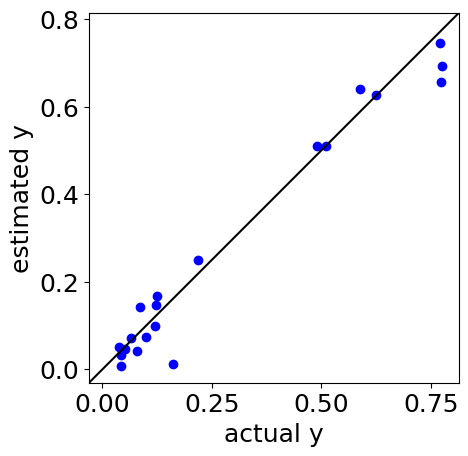

r^2 in cross-validation : 0.9626474051893688
RMSE in cross-validation : 0.053128399189200294
MAE in cross-validation : 0.03772295689551731

トレーニングデータにおけるサポートベクター数 : 10
トレーニングデータにおけるサポートベクターの割合 : 0.5

トレーニングデータにおける外れサンプル数 : 4
トレーニングデータにおける外れサンプルの割合 : 0.2

テストデータにおける外れサンプル数 : 4334
テストデータにおける外れサンプルの割合 : 0.447265221878225


In [5]:
import models
import features
import validation
import numpy as np

# ガウス過程回帰(最初にカーネル関数を選択する)
regression_method = 'gpr_one_kernel'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction, x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.gpr_one_kernel(2,autoscaled_x, autoscaled_y, x)

# バリデーション
validate = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)

# 予測
estimated_y_prediction = models.predict(regression_method, model, autoscaled_x_prediction, x_prediction, y)


# AD
ad_method = 'ocsvm'
k_in_knn = 5  # k-NN における k
ocsvm_nu = 0.04  # OCSVM における ν。トレーニングデータにおけるサンプル数に対する、サポートベクターの数の下限の割合
ocsvm_gamma = 0.1  # OCSVM における γ
ocsvm_gammas = 2 ** np.arange(-20, 11, dtype=float)  # γ の候補
rate_of_training_samples_inside_ad = 0.96  # AD 内となるトレーニングデータの割合。AD　のしきい値を決めるときに使用

ad = models.ad(regression_method, ad_method, autoscaled_x, x, x_prediction, autoscaled_x_prediction, k_in_knn, rate_of_training_samples_inside_ad, estimated_y_prediction, ocsvm_gamma, ocsvm_gammas, ocsvm_nu)

# 次のサンプル
next_sample = x_prediction.loc[estimated_y_prediction.idxmax()]  
next_sample.to_csv('next_sample_{0}_{1}.csv'.format(regression_method, ad_method)) # csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

1 / 11
2 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/an

3 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamaza

4 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Use

5 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.war

6 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihirot

7 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakih

8 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihirot

9 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihirot

10 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/an

11 / 11


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamaza

クロスバリデーションで選択されたカーネル関数の番号 : 3
クロスバリデーションで選択されたカーネル関数 : 1**2 * RBF(length_scale=[1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1)


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


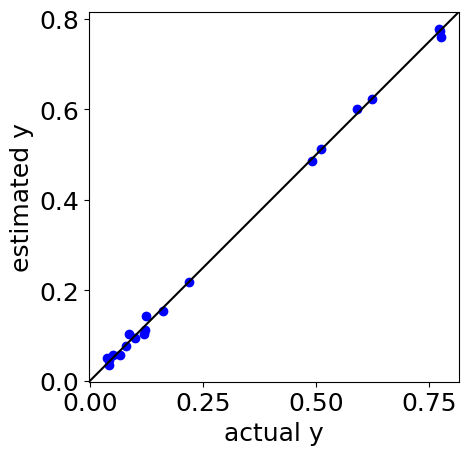

r^2 for training data : 0.9988181693679249
RMSE for training data : 0.00945026448223527
MAE for training data : 0.007725009837985455


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Use

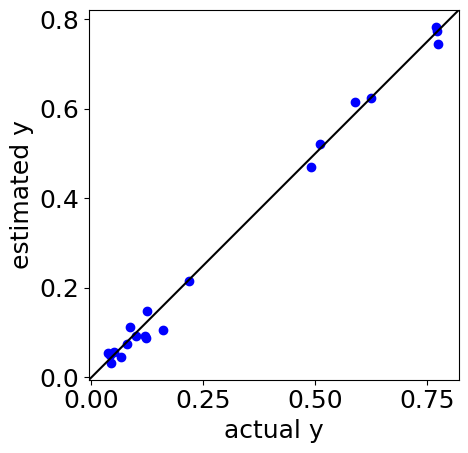

r^2 in cross-validation : 0.9939168694224241
RMSE in cross-validation : 0.021440253278112203
MAE in cross-validation : 0.017085556796240627


In [8]:
import models
import features
import validation

# ガウス過程回帰(最初にカーネル関数を選択する)
regression_method = 'gpr_kernels'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction, x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.gpr_kernels(10,autoscaled_x, autoscaled_y, x, y)

# 予測
predict = validation.validate_model(regression_method, model, 10, autoscaled_x, autoscaled_y, x, y)
